# 2020 Malaysia Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

## Things Explored in this Analysis
- initial exploration of cleaned datasets for happiness and cases in Malaysia
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated)

## Load cleaned csv's into df

In [2]:
malaysia_hap_filter = pd.read_csv('../data/cleaned_data/2020/malaysia_hap_cleaned.csv')
malaysia_cov=pd.read_csv('../data/cleaned_data/2020/malaysia_covid.csv')

## Initial investigation of cleaned subsets

In [3]:
malaysia_hap_filter

,Unnamed: 0,date,week,mental_health_condition,age,gender,happiness_rating
0,1016,2020-04-28,week 2,No,33,Female,10.0
1,1017,2020-04-28,week 2,No,28,Male,3.0
2,1018,2020-04-28,week 2,No,37,Male,1.0
3,1019,2020-04-28,week 2,No,37,Female,8.0
4,1020,2020-04-28,week 2,No,25,Female,5.0
...,...,...,...,...,...,...,...
11112,12128,2020-09-24,week 12,No,19,Male,5.0
11113,12129,2020-09-24,week 12,No,24,Male,5.0
11114,12130,2020-09-24,week 12,No,21,Male,9.0
11115,12131,2020-09-24,week 12,No,20,Male,8.0


In [4]:
malaysia_hap_filter.shape

(11117, 7)

In [5]:
# Get some information on the dataset and range
malaysia_hap_filter['happiness_rating'].describe()

count    11117.000000
mean         6.112800
std          2.051657
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: happiness_rating, dtype: float64

<AxesSubplot:>

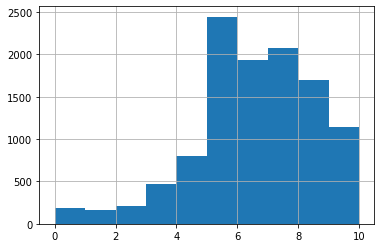

In [6]:
# Histogram to look at distribution
malaysia_hap_filter['happiness_rating'].hist()

In [7]:
malaysia_cov

,Unnamed: 0,Province/State,Country/Region,Lat,Long,date,cases
0,0,NaN,Malaysia,4.210484,101.975766,2020-01-22,0
1,1,NaN,Malaysia,4.210484,101.975766,2020-01-23,0
2,2,NaN,Malaysia,4.210484,101.975766,2020-01-24,0
3,3,NaN,Malaysia,4.210484,101.975766,2020-01-25,3
4,4,NaN,Malaysia,4.210484,101.975766,2020-01-26,4
...,...,...,...,...,...,...,...
312,312,NaN,Malaysia,4.210484,101.975766,2020-11-29,64485
313,313,NaN,Malaysia,4.210484,101.975766,2020-11-30,65697
314,314,NaN,Malaysia,4.210484,101.975766,2020-12-01,67169
315,315,NaN,Malaysia,4.210484,101.975766,2020-12-02,68020


In [8]:
malaysia_cov.shape

(317, 7)

In [9]:
malaysia_cov['cases'].describe()

count      317.00000
mean     11910.81388
std      14689.37108
min          0.00000
25%       4346.00000
50%       8634.00000
75%       9969.00000
max      69095.00000
Name: cases, dtype: float64

In [10]:
malaysia_cov = malaysia_cov[['date','cases']]
malaysia_cov

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,3
4,2020-01-26,4
...,...,...
312,2020-11-29,64485
313,2020-11-30,65697
314,2020-12-01,67169
315,2020-12-02,68020


### Group COVID-19 cases by date

In [11]:
malaysia_cov['date'] = pd.to_datetime(malaysia_cov['date'])

In [12]:
malaysia_date_cov= malaysia_cov.groupby('date').sum()
malaysia_date_cov

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,3
2020-01-26,4
...,...
2020-11-29,64485
2020-11-30,65697
2020-12-01,67169


Text(0, 0.5, 'Cases')

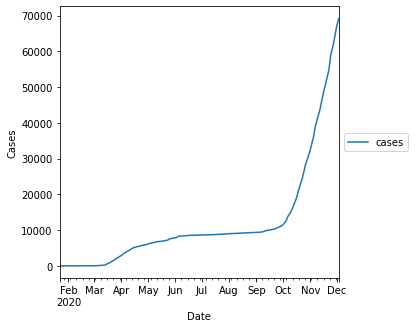

In [13]:
malaysia_date_cov.plot(kind='line',figsize=(5,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

### Observations

Huge surge right now; appears to have been a smaller peak back in April-May.

### Calculating daily changes in COVID-19 cases count

In [14]:
malaysia_date_cov['daily_change'] = malaysia_date_cov['cases'].diff()
malaysia_date_cov

,cases,daily_change
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,3,3.0
2020-01-26,4,1.0
...,...,...
2020-11-29,64485,1309.0
2020-11-30,65697,1212.0
2020-12-01,67169,1472.0


<AxesSubplot:xlabel='date'>

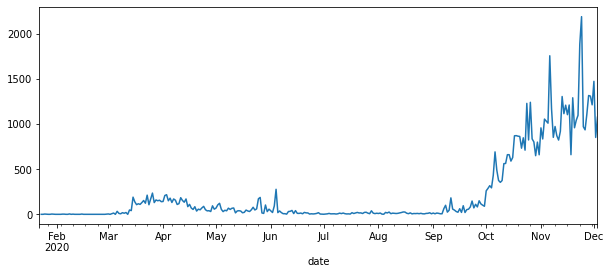

In [15]:
# plot of daily change in cases
malaysia_date_cov['daily_change'].plot(figsize=(10,4))

### Observations
This graph is much clearer. There are two notable periods: one between March and May with the first surge, and the other starting in September with a much larger spike in cases.

In [16]:
malaysia_date_cov.to_csv('../data/exported_subset_data/covid/covid_malaysia.csv')

### Group happiness ratings by date

In [17]:
malaysia_df=malaysia_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()

In [18]:
malaysia_df

,date,happiness_rating
0,2020-01-05,7.000000
1,2020-01-06,4.000000
2,2020-02-09,6.516129
3,2020-03-09,6.333996
4,2020-04-09,6.203704
5,2020-04-28,6.100324
6,2020-04-29,6.043546
7,2020-04-30,5.648148
8,2020-05-09,5.975831
9,2020-05-13,6.114583


### Create new column with just month and year for date

In [19]:
malaysia_df['month_year'] = pd.to_datetime(malaysia_df['date']).dt.to_period('M')

In [20]:
malaysia_df['date'] = pd.to_datetime(malaysia_df['date'])

In [21]:
malaysia_df

,date,happiness_rating,month_year
0,2020-01-05,7.000000,2020-01
1,2020-01-06,4.000000,2020-01
2,2020-02-09,6.516129,2020-02
3,2020-03-09,6.333996,2020-03
4,2020-04-09,6.203704,2020-04
5,2020-04-28,6.100324,2020-04
6,2020-04-29,6.043546,2020-04
7,2020-04-30,5.648148,2020-04
8,2020-05-09,5.975831,2020-05
9,2020-05-13,6.114583,2020-05


## Happiness rating grouped by days vs. COVID-19 daily case changes

<AxesSubplot:label='3443d374-d456-4be2-beb5-8606906d6230'>

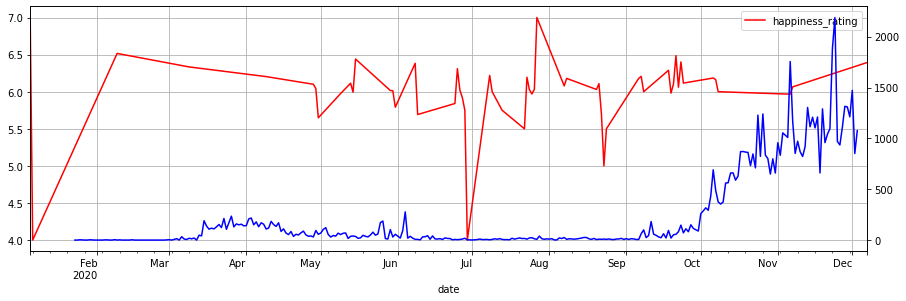

In [22]:
malaysia_df.plot(x='date',y='happiness_rating', color='red',grid=True, figsize=(15,5))
malaysia_date_cov['daily_change'].plot(color='blue', grid=True, secondary_y=True)

In [23]:
malaysia_df.groupby('month_year')['happiness_rating'].mean()

month_year
2020-01    5.500000
2020-02    6.516129
2020-03    6.333996
2020-04    5.998930
2020-05    6.049174
2020-06    5.739858
2020-07    6.076985
2020-08    5.798705
2020-09    6.182441
2020-10    6.115751
2020-11    6.016013
2020-12    6.393939
Freq: M, Name: happiness_rating, dtype: float64

### Observations

Spiky and inconsistent happiness data.

### Merge happiness and COVID-19 cases into one df

In [24]:
merged_df= pd.merge(left=malaysia_df, left_on='date',
         right=malaysia_date_cov, right_on='date')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-09,6.516129,2020-02,16,0.0
1,2020-03-09,6.333996,2020-03,117,18.0
2,2020-04-09,6.203704,2020-04,4228,109.0
3,2020-04-28,6.100324,2020-04,5851,31.0
4,2020-04-29,6.043546,2020-04,5945,94.0
5,2020-04-30,5.648148,2020-04,6002,57.0
6,2020-05-09,5.975831,2020-05,6589,54.0
7,2020-05-13,6.114583,2020-05,6779,37.0
8,2020-05-14,5.993243,2020-05,6819,40.0
9,2020-05-15,6.440000,2020-05,6855,36.0


<AxesSubplot:xlabel='date'>

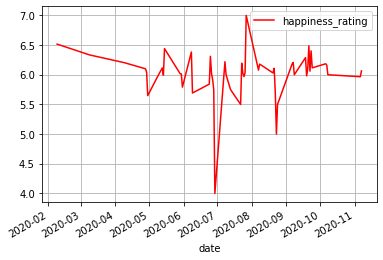

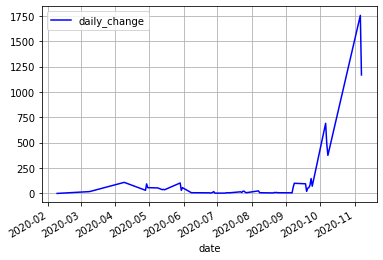

In [25]:
merged_df.plot(x='date', y='happiness_rating', color='red',grid=True)
merged_df.plot(x='date', y='daily_change', color='blue', grid=True)

In [26]:
merged_df['month_year'] = pd.to_datetime(merged_df['date']).dt.to_period('M')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-09,6.516129,2020-02,16,0.0
1,2020-03-09,6.333996,2020-03,117,18.0
2,2020-04-09,6.203704,2020-04,4228,109.0
3,2020-04-28,6.100324,2020-04,5851,31.0
4,2020-04-29,6.043546,2020-04,5945,94.0
5,2020-04-30,5.648148,2020-04,6002,57.0
6,2020-05-09,5.975831,2020-05,6589,54.0
7,2020-05-13,6.114583,2020-05,6779,37.0
8,2020-05-14,5.993243,2020-05,6819,40.0
9,2020-05-15,6.440000,2020-05,6855,36.0


In [27]:
merged_df['month_year']

0     2020-02
1     2020-03
2     2020-04
3     2020-04
4     2020-04
5     2020-04
6     2020-05
7     2020-05
8     2020-05
9     2020-05
10    2020-05
11    2020-05
12    2020-05
13    2020-06
14    2020-06
15    2020-06
16    2020-06
17    2020-06
18    2020-06
19    2020-06
20    2020-06
21    2020-07
22    2020-07
23    2020-07
24    2020-07
25    2020-07
26    2020-07
27    2020-07
28    2020-07
29    2020-07
30    2020-08
31    2020-08
32    2020-08
33    2020-08
34    2020-08
35    2020-08
36    2020-08
37    2020-09
38    2020-09
39    2020-09
40    2020-09
41    2020-09
42    2020-09
43    2020-09
44    2020-09
45    2020-09
46    2020-09
47    2020-10
48    2020-10
49    2020-10
50    2020-11
51    2020-11
Name: month_year, dtype: period[M]

### Monthly COVID-19 cases plotted with monthly happiness rating means

<AxesSubplot:label='1d2da1e8-13c3-414e-9d21-eb3b5470796f'>

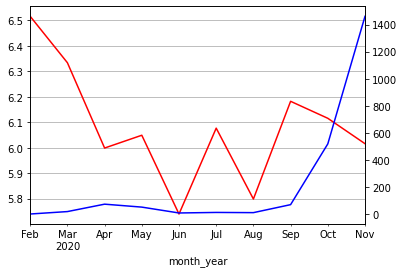

In [28]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

### Observations
Some fluctuations in happiness ratings, notably as 2020 has progressed the mean has lowered (started from 6.5, but now fluctuates around 6).

### Weekly COVID-19 plot

<AxesSubplot:xlabel='date'>

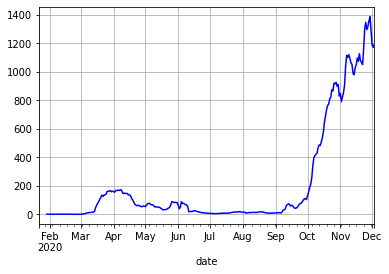

In [39]:
weekly_covid= malaysia_date_cov.rolling(7).mean()
weekly_covid['daily_change'].plot(color='blue', grid=True)

## Interpolated Happiness Ratings

In [31]:
malaysia_df_daily=malaysia_df.set_index(pd.to_datetime(malaysia_df['date']))

In [32]:
malaysia_df_daily=malaysia_df_daily[['date', 'happiness_rating']]

<AxesSubplot:xlabel='date'>

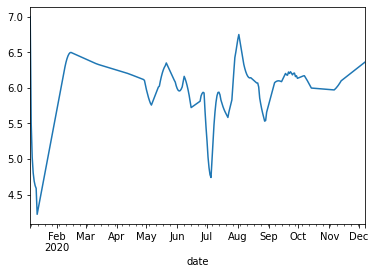

In [33]:
malaysia_df_daily.resample('D').interpolate().rolling('7D')['happiness_rating'].mean().plot()


In [34]:
malaysia_df_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_malaysia.csv')

<AxesSubplot:label='71850f6a-2f34-4b57-9855-8768f1bbb6f7'>

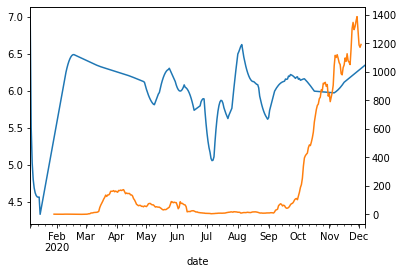

In [35]:
malaysia_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(secondary_y=True)

### Observations
Some correlations: dip in happiness around April while first spike in cases. Afterwards, had fluctuations as cases stabilized and seems to have little correlation with cases afterwards. Not as dramatic of fluctuations compared to other countries (like Denmark).

## Happiness rating mean for 2020 as a whole in Malaysia

In [36]:
malaysia_hap_filter['happiness_rating'].mean()

6.1128002158855805

### Observations
Malaysia's happiness rating in 2019 was 5.4280. Slight increase in happiness surprisingly. This is VERY fascinating. I have a feeling I'll have to look at the context of COVID-19 in Malaysia as to why happiness has actually gone up.